In [6]:
import corruptions
import numpy
import torch
import corruption_constants
import numpy as np
import torch
import numpy as np
import math
import time
import torch.nn.functional as F
import matplotlib.pyplot as plt
import random

/Users/tingxi/opt/anaconda3/envs/bullet37/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
c=("gaussian_noise","shot_noise","impulse_noise","motion_blur","zoom_blur","fog","brightness","contrast","jpeg_compression")

In [3]:
corrupt_func = c[0]
severity = 5
# print(torch.min(obs), torch.max(obs), torch.mean(obs), torch.sum(obs), torch.std(obs))
# tensor(0.) tensor(0.0299) tensor(0.0007) tensor(56.0894) tensor(0.0045)

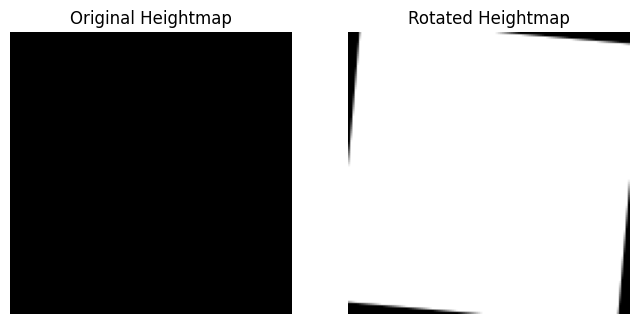

In [8]:
def rotation(x, severity):
    x = x.clone()
    angle_degrees = torch.tensor([5., 10., 15., 20., 25])[severity-1]
    assert len(x.shape) == 4
    assert x.shape[1] == 1
    for idx in range(x.shape[0]):

        if random.choice([True, False]):
            angle_degrees *= -1

        heightmap = x[idx][0].clone()
        rotated_heightmap = F.affine_grid(torch.tensor([[math.cos(math.radians(angle_degrees)), math.sin(math.radians(angle_degrees)), 0],
                                                [-math.sin(math.radians(angle_degrees)), math.cos(math.radians(angle_degrees)), 0]]).unsqueeze(0),
                                   torch.Size([1, 1, heightmap.size(0), heightmap.size(1)]),
                                   align_corners=False)
        rotated_heightmap = F.grid_sample(heightmap.unsqueeze(0).unsqueeze(0), rotated_heightmap, align_corners=False)
        rotated_heightmap = rotated_heightmap.squeeze()
        x[idx][0] = rotated_heightmap
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(heightmap, cmap='gray')
        plt.title('Original Heightmap')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(rotated_heightmap, cmap='gray')
        plt.title('Rotated Heightmap')
        plt.axis('off')

        plt.show()
    return x

rnd = torch.ones(1,1,128,128)
_ = rotation(rnd.clone(),severity=1)

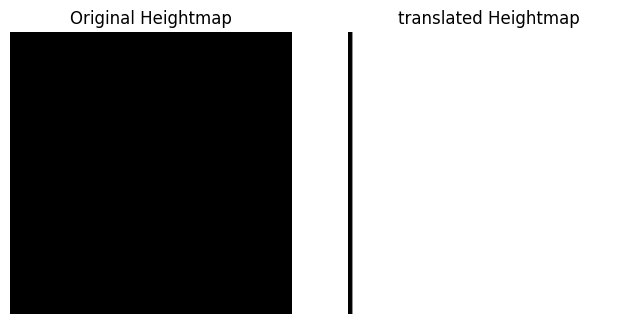

In [14]:
def translation(x, severity):
    x = x.clone()
    s = torch.tensor([0.02, 0.04, 0.06, 0.08, 0.10])[severity-1]
    num_positions = (x.shape[-1] * s).int()
    assert len(x.shape) == 4
    assert x.shape[1] == 1
    for idx in range(x.shape[0]):
        heightmap = x[idx][0].clone()
        heightmap = tensor_image
        direction = random.choice(['Left', 'Right', 'Up', 'Down'])
        if direction == 'Left':
            translated_heightmap = torch.cat((heightmap[:, num_positions:], torch.zeros(heightmap.size(0), num_positions)), dim=1)
        if direction == 'Right':
            translated_heightmap = torch.cat((torch.zeros(heightmap.size(0), num_positions), heightmap[:, :-num_positions]), dim=1)
        if direction == 'Up':
            translated_heightmap = torch.cat((heightmap[num_positions:], torch.zeros(num_positions, heightmap.size(1))), dim=0)
        if direction == 'Down':
            translated_heightmap = torch.cat((torch.zeros(num_positions, heightmap.size(1)), heightmap[:-num_positions]), dim=0)
        x[idx][0] = translated_heightmap
        plt.figure(figsize=(8, 4))
        plt.subplot(1, 2, 1)
        plt.imshow(heightmap, cmap='gray')
        plt.title('Original Heightmap')
        plt.axis('off')

        plt.subplot(1, 2, 2)
        plt.imshow(translated_heightmap, cmap='gray')
        plt.title('translated Heightmap')
        plt.axis('off')

        plt.show()
    return x
from PIL import Image
dir = '/Users/tingxi/BulletArm/before,0.png'
image = Image.open(dir)
transform = torch.nn.functional.to_tensor
tensor_image = transform(image)
_ = translation(rnd, severity=1)

In [16]:
aa = torch.rand(2,1,100,100)
for a in aa:
    a.squeeze()

In [4]:
def reset():
    return 'state','in_hand','obs'
def step():
    return ('state','in_hand','obs'),'reward','done'
res = step()
(reset(), *res[1:])

(('state', 'in_hand', 'obs'), 'reward', 'done')

In [14]:
dones = torch.ones(1,1,2,2)
dones = torch.tensor([[False, False], [False, False]])

In [15]:
if dones.sum():
    print(1)